# Demonestic and Inbouned 

## Libraries 

In [35]:
import pandas as pd

from prophet import Prophet

from sklearn.metrics import mean_absolute_percentage_error

Importing plotly failed. Interactive plots will not work.


## domenstic data 

In [2]:
# domenstic data 
## read data file
df_d = pd.read_excel('raw_data/D_data.xlsx')

## crete date column and set it as index then drop the (yeaer month) columns
df_d['Date'] = pd.to_datetime(df_d['Year'].astype(str) + ' ' + df_d['Month'])
df_d.set_index('Date', inplace=True)
df_d.drop(columns=['Year', 'Month'], inplace=True)
df_d = df_d.dropna()

## rename the column
df_d.rename(columns={'Tourists Number Overnight Visitors': 'number of visitor'}, inplace=True)

/tmp/ipykernel_1023/3934125829.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_d['Date'] = pd.to_datetime(df_d['Year'].astype(str) + ' ' + df_d['Month'])


In [3]:
visitor_num_d = pd.DataFrame(df_d['number of visitor'])
spend_d = pd.DataFrame(df_d['Tourists Spending'])
# spend_d

### data visualizing

### models for VISITORS NUM

#### data split

In [4]:
# Let's keep the last 20% of the values out for testing purposes
train_size = 0.9
visitor_num_d_index = round(train_size*visitor_num_d.shape[0])

## VISITOR DATA
visitor_num_d_train = visitor_num_d.iloc[:visitor_num_d_index]
visitor_num_d_test = visitor_num_d.iloc[visitor_num_d_index:]

#### baseline model

In [5]:
## predict the # visitors of prevus month as the # visitors of next month
visitor_num_d_y_pred = visitor_num_d_test.shift(1).dropna()
visitor_num_d_y_true = visitor_num_d_test[1:]

visitor_num_d_base_accuracy = mean_absolute_percentage_error(visitor_num_d_y_true, visitor_num_d_y_pred)
print(f"baseline model mape for visitor_num : {visitor_num_d_base_accuracy}")

baseline model mape for visitor_num : 0.16183560329824545


In [6]:
# from darts.models import NaiveSeasonal

# naive_model = NaiveSeasonal(K=1)
# naive_model.fit(visitor_num_d_train)
# # naive_forecast = naive_model.predict(len(val))
# # naive_forecast


# # visitor_num_d_train.plot(label="actual")
# # visitor_num_d_test.plot(label = "test")
# # naive_forecast.plot(label="naive forecast (K=1)")

#### Prophet

In [7]:
## prepare data for prophet TRAIN 
visitor_num_d_prophet_train = visitor_num_d_train.reset_index().rename(columns={
    'Date': 'ds',
    'number of visitor': 'y'
})

# Make sure 'ds' is datetime
# visitor_num_d_prophet_train['ds'] = pd.to_datetime(visitor_num_d_prophet_train['ds'])
# visitor_num_d_prophet_train

## prepare data for prophet TEST 
visitor_num_d_prophet_test = visitor_num_d_test.reset_index().rename(columns={
    'Date': 'ds',
    'number of visitor': 'y'
})

# Make sure 'ds' is datetime
# visitor_num_d_prophet_test['ds'] = pd.to_datetime(visitor_num_d_prophet_test['ds'])


In [8]:
# Fit the model
prophet = Prophet()
prophet.fit(visitor_num_d_prophet_train)

# Prepare the future DataFrame (dates) for prediction
future = visitor_num_d_prophet_test[['ds']]  # Just the dates from your test set
preds = prophet.predict(future)  # Get predictions

# Calculate accuracy using MAPE
y_true = visitor_num_d_prophet_test['y'].values
y_pred = preds['yhat'].values
visitor_num_d_prophet_accuracy = mean_absolute_percentage_error(y_true, y_pred)

# Print accuracy
print(f"Prophet MAPE for visitor_num: {visitor_num_d_prophet_accuracy:.2%}")
## WITH DIFFERENT SPLIT SIZE: 
## lower is better
# 0.9 >> MAPE: 8.41%
# 0.85 >> MAPE: 11.44%
# 0.8 >> MAPE: 23.42%


09:26:23 - cmdstanpy - INFO - Chain [1] start processing
09:26:23 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAPE for visitor_num: 8.41%


delete or not??????

In [9]:
# Fit the model
prophet = Prophet()
prophet.fit(visitor_num_d_prophet_train)

# Prepare the future DataFrame (dates) for prediction
Test_size = visitor_num_d_prophet_test.shape[0]
future = prophet.make_future_dataframe(periods=Test_size, freq='m')
forecast = prophet.predict(future)
predictions = forecast.tail(Test_size)

error = mean_absolute_percentage_error(visitor_num_d_prophet_test['y'], predictions['yhat'])   
print('error is:', error)

09:26:23 - cmdstanpy - INFO - Chain [1] start processing
09:26:23 - cmdstanpy - INFO - Chain [1] done processing
/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


error is: 0.07437681179946537


### models for SPENDS

#### data split 

In [10]:
## SPENDS DATA
train_size = 0.9
spends_d_index = round(train_size*spend_d.shape[0])

spends_d_train = spend_d.iloc[:spends_d_index]
spends_d_test = spend_d.iloc[spends_d_index:]

#### baseline model

In [11]:
## predict the # visitors of prevus month as the # visitors of next month
spends_d_y_pred = spends_d_test.shift(1).dropna()
spends_d_y_true = spends_d_test[1:]
spends_d_base_accuracy = mean_absolute_percentage_error(spends_d_y_true, spends_d_y_pred)
print(f"baseline model mape for spends: {spends_d_base_accuracy}")

baseline model mape for spends: 0.12697341353249217


#### prophet

In [12]:
## prepare data for prophet TRAIN 
spends_d_prophet_train = spends_d_train.reset_index().rename(columns={
    'Date': 'ds',
    'Tourists Spending': 'y'
})

# # Make sure 'ds' is datetime
# spends_d_prophet_train['ds'] = pd.to_datetime(spends_d_prophet_train['ds'])
# spends_d_prophet_train

## prepare data for prophet TEST 
spends_d_prophet_test = spends_d_test.reset_index().rename(columns={
    'Date': 'ds',
    'Tourists Spending': 'y'
})

# Make sure 'ds' is datetime
# spends_d_prophet_test['ds'] = pd.to_datetime(spends_d_prophet_test['ds'])


In [13]:
# Fit the model
prophet = Prophet()
prophet.fit(spends_d_prophet_train)

# Prepare the future DataFrame (dates) for prediction
future = spends_d_prophet_test[['ds']]  # Just the dates from your test set
preds = prophet.predict(future)  # Get predictions

# Calculate accuracy using MAPE
y_true = spends_d_prophet_test['y'].values
y_pred = preds['yhat'].values
spends_d_prophet_accuracy = mean_absolute_percentage_error(y_true, y_pred)

# Print accuracy
print(f"Prophet MAPE for spends: {spends_d_prophet_accuracy:.2%}")
## WITH DIFFERENT SPLIT SIZE: 
# 0.9 >> MAPE: 10.97%
# 0.85 >> MAPE: MAPE: 14.14%
# 0.8 >> MAPE: 39.65%


09:26:23 - cmdstanpy - INFO - Chain [1] start processing
09:26:23 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAPE for spends: 10.97%


delete or not??????

In [14]:

# Fit the model
prophet = Prophet()
prophet.fit(spends_d_prophet_test)

# Prepare the future DataFrame (dates) for prediction
Test_size = spends_d_prophet_test.shape[0]
future = prophet.make_future_dataframe(periods=Test_size, freq='m')
forecast = prophet.predict(future)
predictions = forecast.tail(Test_size)

error = mean_absolute_percentage_error(spends_d_prophet_test['y'], predictions['yhat'])   
print('error is:', error)

09:26:23 - cmdstanpy - INFO - Chain [1] start processing
09:26:23 - cmdstanpy - INFO - Chain [1] done processing


error is: 0.2571648146607834


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


## ERROR

#### SARIMA

In [15]:
from statsmodels.tsa.stattools import adfuller
# check if our data is stationary or non 
# SARIMA requires that your data be stationary (i.e., the statistical properties don’t change over time). 
# If your data is non-stationary, you can apply differencing.

result = adfuller(visitor_num_d_train['number of visitor'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

#  p-value > 0.05, apply differencing.

ADF Statistic: -0.11995162478481129
p-value: 0.9474146563395988


In [16]:
## diffrencing 
visitor_num_d_train['diff'] = visitor_num_d_train['number of visitor'].diff().dropna()
visitor_num_d_train

/tmp/ipykernel_1023/2042314778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visitor_num_d_train['diff'] = visitor_num_d_train['number of visitor'].diff().dropna()


,number of visitor,diff
Date,,
2015-01-01,4823.334549,NaN
2015-02-01,4140.102538,-683.232011
2015-03-01,3859.551814,-280.550724
2015-04-01,3539.225495,-320.326319
2015-05-01,3332.502920,-206.722575
...,...,...
2023-03-01,6502.156000,894.519000
2023-04-01,6881.296000,379.140000
2023-05-01,5002.991000,-1878.305000


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.metrics import mean_absolute_percentage_error

In [18]:
# import pmdarima as pm

# smodel = pm.auto_arima(visitor_num_d_train, seasonal=True, m=12, 
#                        start_p=0, max_p=1, max_d=1, start_q=0, max_q=1,
#                        start_P=0, max_P=2, max_D=1, start_Q=0, max_Q=2, 
#                        trace=True, error_action='ignore', suppress_warnings=True)

In [19]:

from pmdarima import auto_arima
series = visitor_num_d_train['number of visitor']
series.index = pd.DatetimeIndex(series.index, freq='MS')  
stepwise_model = auto_arima(series, seasonal=True, m=12,  # set m = season length
                            trace=True, 
                            suppress_warnings=True)
print(stepwise_model.summary())

/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be remov

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.90 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1799.856, Time=0.02 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1761.939, Time=0.39 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1745.954, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1797.902, Time=0.03 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1753.910, Time=0.19 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1747.541, Time=0.93 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1747.334, Time=1.03 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1745.813, Time=0.40 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=1747.432, Time=1.10 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1785.084, Time=0.18 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1746.354, Time=0.92 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=1746.677, Time=0.89 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.39 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[12]             : AIC=1744.503, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1753.770, Time=0.08 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,0)[12]             : AIC=1746.173, Time=0.60 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12]             : AIC=1746.267, Time=0.35 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=1744.860, Time=0.18 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,1)[12]             : AIC=1748.134, Time=0.83 sec
 ARIMA(0,1,0)(1,0,0)[12]             : AIC=1783.647, Time=0.06 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[12]             : AIC=1745.445, Time=0.27 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,0)[12]             : AIC=1745.636, Time=0.24 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12]             : AIC=1759.993, Time=0.26 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[12]             : AIC=1746.584, Time=0.65 sec

Best model:  ARIMA(0,1,1)(1,0,0)[12]          
Total fit time: 14.906 seconds
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  103
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 12)   Log Likelihood                -869.252
Date:                             Wed, 23 Apr 2025   AIC                           1744.503
Time:                                     09:26:39   BIC                           1752.378
Sample:                                 01-01-2015   HQIC                          1747.692
                                      - 07-01-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

In [20]:
from pmdarima import auto_arima
stepwise_model = auto_arima(visitor_num_d_train['number of visitor'], 
                            seasonal=True, m=12,  # set m = season length
                            trace=True, 
                            suppress_warnings=True)
print(stepwise_model.summary())

Performing stepwise search to minimize aic


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be remov

 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1799.856, Time=0.02 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1761.939, Time=0.26 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1745.954, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1797.902, Time=0.06 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1753.910, Time=0.17 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1747.541, Time=0.70 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1747.334, Time=1.15 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1745.813, Time=0.44 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=1747.432, Time=0.80 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.02 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1785.084, Time=0.27 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1746.354, Time=0.70 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=1746.677, Time=0.60 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.13 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[12]             : AIC=1744.503, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1753.770, Time=0.08 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,0)[12]             : AIC=1746.173, Time=0.82 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12]             : AIC=1746.267, Time=0.54 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12]             : AIC=1744.860, Time=0.29 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,1)[12]             : AIC=1748.134, Time=0.95 sec
 ARIMA(0,1,0)(1,0,0)[12]             : AIC=1783.647, Time=0.05 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[12]             : AIC=1745.445, Time=0.34 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,0)[12]             : AIC=1745.636, Time=0.38 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=1759.993, Time=0.17 sec


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[12]             : AIC=1746.584, Time=0.78 sec

Best model:  ARIMA(0,1,1)(1,0,0)[12]          
Total fit time: 13.754 seconds
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  103
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 12)   Log Likelihood                -869.252
Date:                             Wed, 23 Apr 2025   AIC                           1744.503
Time:                                     09:26:53   BIC                           1752.378
Sample:                                 01-01-2015   HQIC                          1747.692
                                      - 07-01-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

In [21]:
#this for fitting the model
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(visitor_num_d_train['diff'],
                order=(p, d, q),
                seasonal_order=(P, D, Q, s),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()
print(results.summary())

NameError: name 'p' is not defined

In [ ]:
#this for forecasting                                           forecast = results.get_forecast(steps=12)  # 12 months ahead, for example
forecast_ci = forecast.conf_int()

# Plot
ax = df['your_target_column'].plot(label='Observed', figsize=(12, 6))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

In [ ]:

plot_acf(visitor_num_d_train['number of visitor'], lags=44);
plot_pacf(visitor_num_d_train['number of visitor'], lags=44);
plt.show()

In [ ]:
smodel = pm.auto_arima(train, seasonal=True, m=12, 
                       start_p=0, max_p=1, max_d=1, start_q=0, max_q=1,
                       start_P=0, max_P=2, max_D=1, start_Q=0, max_Q=2, 
                       trace=True, error_action='ignore', suppress_warnings=True)

## inbound data  

In [23]:
# inbound data 
## read data file
df_i = pd.read_excel('raw_data/I_data.xlsx')

## crete date column and set it as index then drop the (yeaer month) columns
df_i['Date'] = pd.to_datetime(df_i['Year'].astype(str) + ' ' + df_i['Month'])
df_i.set_index('Date', inplace=True)
df_i.drop(columns=['Year', 'Month'], inplace=True)
df_i = df_i.dropna()

## rename the column
df_i.rename(columns={'Tourists Number Overnight Visitors': 'number of visitor'}, inplace=True)
# df_i.head()

/tmp/ipykernel_1023/953207289.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_i['Date'] = pd.to_datetime(df_i['Year'].astype(str) + ' ' + df_i['Month'])


In [24]:
visitor_num_i = pd.DataFrame(df_i['number of visitor'])
spend_i = pd.DataFrame(df_i['Tourists Spending'])
# visitor_num_i

### data visualizing

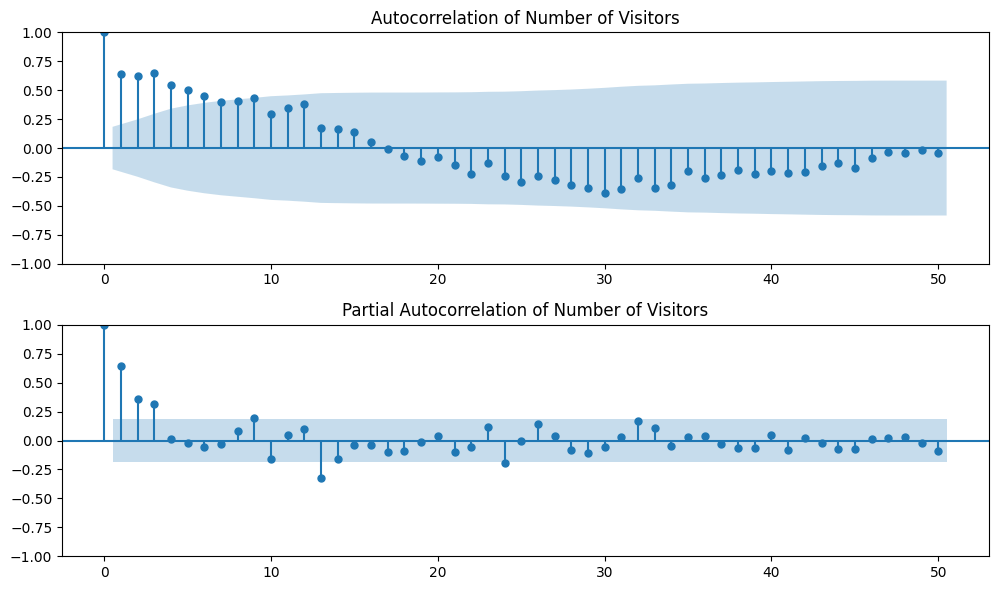

In [41]:
# ACF and PACF plots for the target variable "Number of Visitors" ( البيانات تحتوي على اعتماد زمني (time dependence)، وهي سمة مهمة في نماذج ARIMA.)
# These plots help us understand how current values are related to past values (lags)
# ACF shows overall correlations at different lags
# PACF shows the direct correlation at each lag, after removing effects of earlier lags

fig, ax = plt.subplots(2, 1, figsize=(10, 6))  

# Autocorrelation plot
plot_acf(visitor_num_i, lags=50, ax=ax[0])
ax[0].set_title("Autocorrelation of Number of Visitors")

# Partial Autocorrelation plot
plot_pacf(visitor_num_i, lags=50, ax=ax[1])
ax[1].set_title("Partial Autocorrelation of Number of Visitors")

plt.tight_layout()
plt.show()

#The data shows time dependency, meaning current values are influenced by previous ones.

<Figure size 1400x600 with 0 Axes>

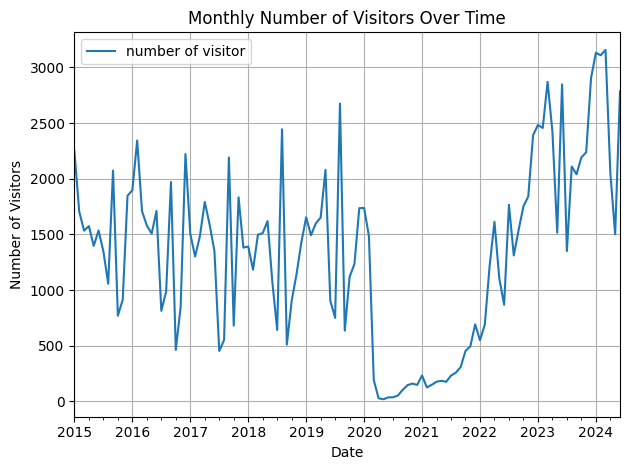

In [23]:
# Line Plot of Visitor Numbers over Time
plt.figure(figsize=(14, 6))  
visitor_num_i.plot()
plt.title("Monthly Number of Visitors Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Visitors")
plt.grid(True)
plt.tight_layout()
plt.show()

## statistical inference(I)

### Decomposition

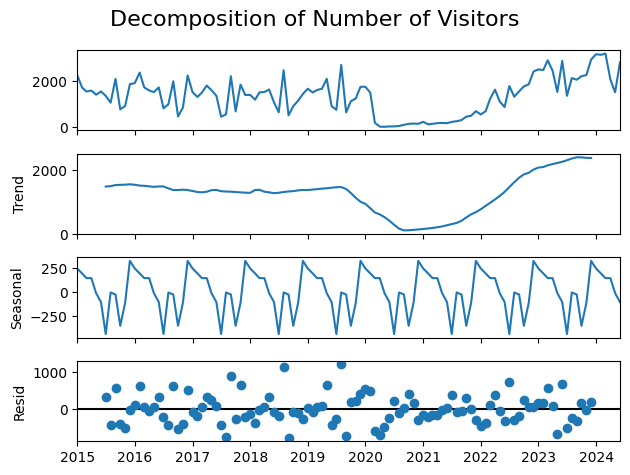

In [33]:
#Trend: shows the overall direction of the data over time.
#Seasonal: reveals repeating patterns ( monthly tourist behavior).
#Residual: shows what’s left after removing trend and seasonality (random noise).
visitor_num_i.index = pd.to_datetime(visitor_num_i.index)
decompose_result = seasonal_decompose(visitor_num_i, model='additive', period=12)
decompose_result.plot()
plt.suptitle("Decomposition of Number of Visitors", fontsize=16)
plt.tight_layout()
plt.show()


### Stationarity and ADF Test

In [38]:
# ADF Test checks if the time series is stationary.
# Since the p-value is high, the 'Number of Visitors' is not stationary.
# We need to apply differencing before building ARIMA or SARIMA models.

result_visitors = adfuller(visitor_num_d.dropna())
print("ADF Statistic for Number of Visitors:", result_visitors[0])
print("p-value:", result_visitors[1])

    ## Number of Visitors" is not stationary

ADF Statistic for Number of Visitors: -0.14244071157071259
p-value: 0.9450437435883299


### models for VISITORS NUM

#### data split

In [25]:
train_size = 0.9
visitor_num_i_index = round(train_size*visitor_num_i.shape[0])

## VISITOR DATA
visitor_num_i_train = visitor_num_i.iloc[:visitor_num_i_index]
visitor_num_i_test = visitor_num_i.iloc[visitor_num_i_index:]
visitor_num_i_test.shape

(11, 1)

#### baseline model

In [27]:
## predict the # visitors of prevus month as the # visitors of next month
visitor_num_i_y_pred = visitor_num_i_test.shift(1).dropna()
visitor_num_i_y_true = visitor_num_i_test[1:]

visitor_num_i_base_accuracy = mean_absolute_percentage_error(visitor_num_i_y_true, visitor_num_i_y_pred)
print(f"baseline model mape for visitor_num in the inbouned dataset: {visitor_num_i_base_accuracy}")

baseline model mape for visitor_num in the inbouned dataset: 0.18169292402492024


#### Prophet

In [28]:
## prepare data for prophet TRAIN 
# Make sure 'ds' is datetime
visitor_num_i_prophet_train = visitor_num_i_train.reset_index().rename(columns={
    'Date': 'ds',
    'number of visitor': 'y'
})

## prepare data for prophet TEST 
visitor_num_i_prophet_test = visitor_num_i_test.reset_index().rename(columns={
    'Date': 'ds',
    'number of visitor': 'y'
})
visitor_num_i_prophet_train.shape, visitor_num_i_prophet_test.shape

((103, 2), (11, 2))

In [29]:
# Fit the model
prophet = Prophet()
prophet.fit(visitor_num_i_prophet_train)

# Prepare the future DataFrame (dates) for prediction
future = visitor_num_i_prophet_test[['ds']]  # Just the dates from your test set
preds = prophet.predict(future)  # Get predictions

# Calculate accuracy using MAPE
y_true = visitor_num_i_prophet_test['y'].values
y_pred = preds['yhat'].values
visitor_num_i_prophet_accuracy = mean_absolute_percentage_error(y_true, y_pred)

# Print accuracy
print(f"Prophet MAPE for visitor_num in the inbouned dataset: {visitor_num_i_prophet_accuracy:.2%}")
## WITH DIFFERENT SPLIT SIZE: 
## lower is better
# 0.9 >> MAPE: 8.41%
# 0.85 >> MAPE: 11.44%
# 0.8 >> MAPE: 23.42%


09:28:41 - cmdstanpy - INFO - Chain [1] start processing
09:28:41 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAPE for visitor_num in the inbouned dataset: 56.32%


In [31]:
# Fit the model
prophet = Prophet()
prophet.fit(visitor_num_i_prophet_train)

# Prepare the future DataFrame (dates) for prediction
Test_size = visitor_num_i_prophet_test.shape[0]
future = prophet.make_future_dataframe(periods=Test_size, freq='m')
forecast = prophet.predict(future)
predictions = forecast.tail(Test_size)

error = mean_absolute_percentage_error(visitor_num_i_prophet_test['y'], predictions['yhat'])   
print('error is:', error)

09:30:35 - cmdstanpy - INFO - Chain [1] start processing
09:30:35 - cmdstanpy - INFO - Chain [1] done processing


error is: 0.5633005248669133


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


### models for SPENDS

#### data split

In [32]:
## SPENDS DATA
train_size = 0.9
spends_i_index = round(train_size*spend_i.shape[0])

spends_i_train = spend_i.iloc[:spends_i_index]
spends_i_test = spend_i.iloc[spends_i_index:]

#### baseline model

In [33]:
## predict the # visitors of prevus month as the # visitors of next month
spends_i_y_pred = spends_i_test.shift(1).dropna()
spends_i_y_true = spends_i_test[1:]
spends_i_base_accuracy = mean_absolute_percentage_error(spends_i_y_true, spends_i_y_pred)
print(f"baseline model mape for spends in the inbouned data: {spends_i_base_accuracy}")

baseline model mape for spends in the inbouned data: 0.2505565791089078


#### Prophet

In [34]:
## prepare data for prophet TRAIN  
# Make sure 'ds' is datetime
spends_i_prophet_train = spends_i_train.reset_index().rename(columns={
    'Date': 'ds',
    'Tourists Spending': 'y'
})
spends_i_prophet_test = spends_i_test.reset_index().rename(columns={
    'Date': 'ds',
    'Tourists Spending': 'y'
})

In [35]:
# Fit the model
prophet = Prophet()
prophet.fit(spends_i_prophet_train)

# Prepare the future DataFrame (dates) for prediction
future = spends_i_prophet_test[['ds']]  # Just the dates from your test set
preds = prophet.predict(future)  # Get predictions

# Calculate accuracy using MAPE
y_true = spends_i_prophet_test['y'].values
y_pred = preds['yhat'].values
spends_i_prophet_accuracy = mean_absolute_percentage_error(y_true, y_pred)

# Print accuracy
print(f"Prophet MAPE for spends in the inbouned dataset: {spends_i_prophet_accuracy:.2%}")
## WITH DIFFERENT SPLIT SIZE: 
# 0.9 >> MAPE: 10.97%
# 0.85 >> MAPE: MAPE: 14.14%
# 0.8 >> MAPE: 39.65%


09:30:51 - cmdstanpy - INFO - Chain [1] start processing
09:30:51 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAPE for spends in the inbouned dataset: 46.96%


In [36]:

# Fit the model
prophet = Prophet()
prophet.fit(spends_i_prophet_test)

# Prepare the future DataFrame (dates) for prediction
Test_size = spends_i_prophet_test.shape[0]
future = prophet.make_future_dataframe(periods=Test_size, freq='m')
forecast = prophet.predict(future)
predictions = forecast.tail(Test_size)

error = mean_absolute_percentage_error(spends_i_prophet_test['y'], predictions['yhat'])   
print('error is:', error)

09:30:56 - cmdstanpy - INFO - Chain [1] start processing
09:30:56 - cmdstanpy - INFO - Chain [1] done processing


error is: 1.416021364220852


/home/sukainah/.pyenv/versions/3.10.6/envs/saudi_arabia_tourism_forecast/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
